In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

sns.set()


## data processing

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.drop('Id', inplace=True, axis=1)
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## data visualization

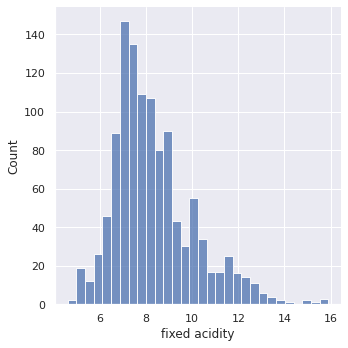

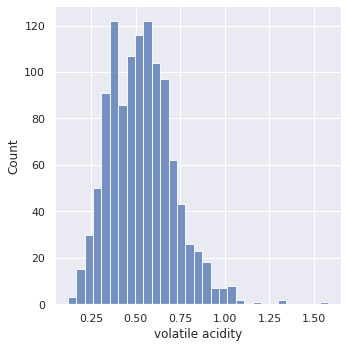

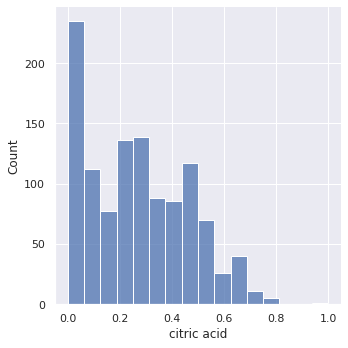

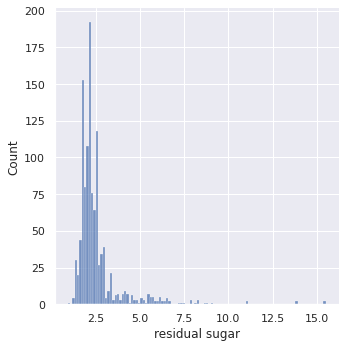

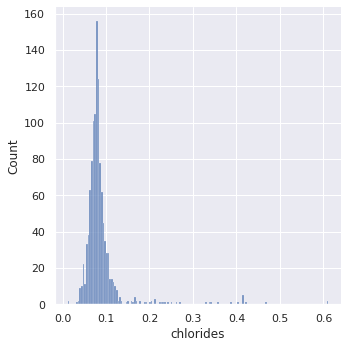

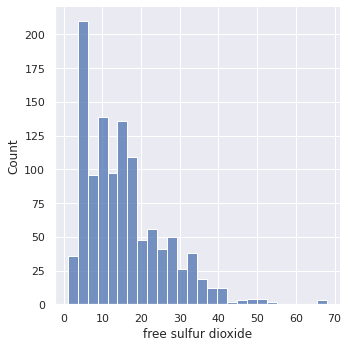

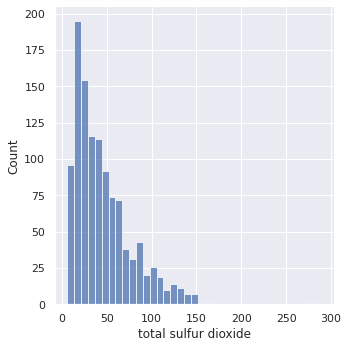

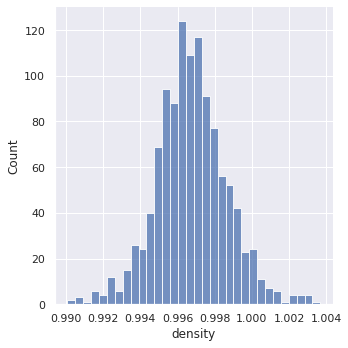

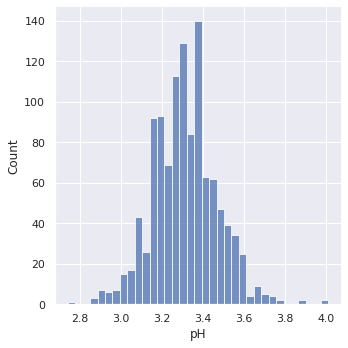

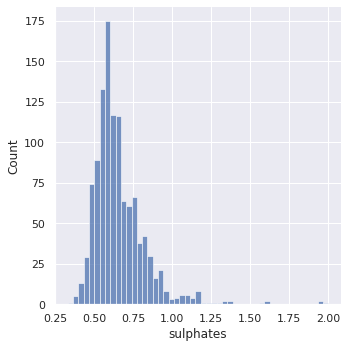

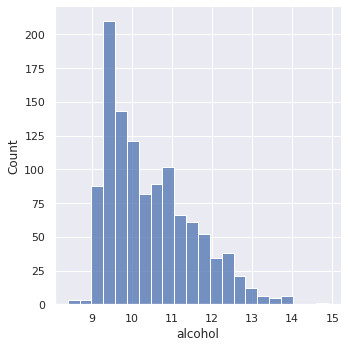

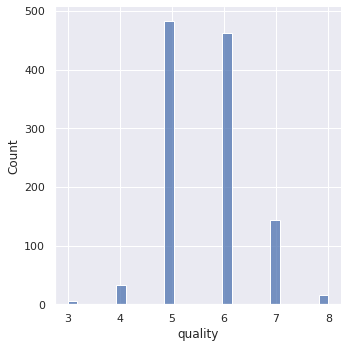

In [6]:
for i in df.columns:
    sns.displot(data=df, x=i)

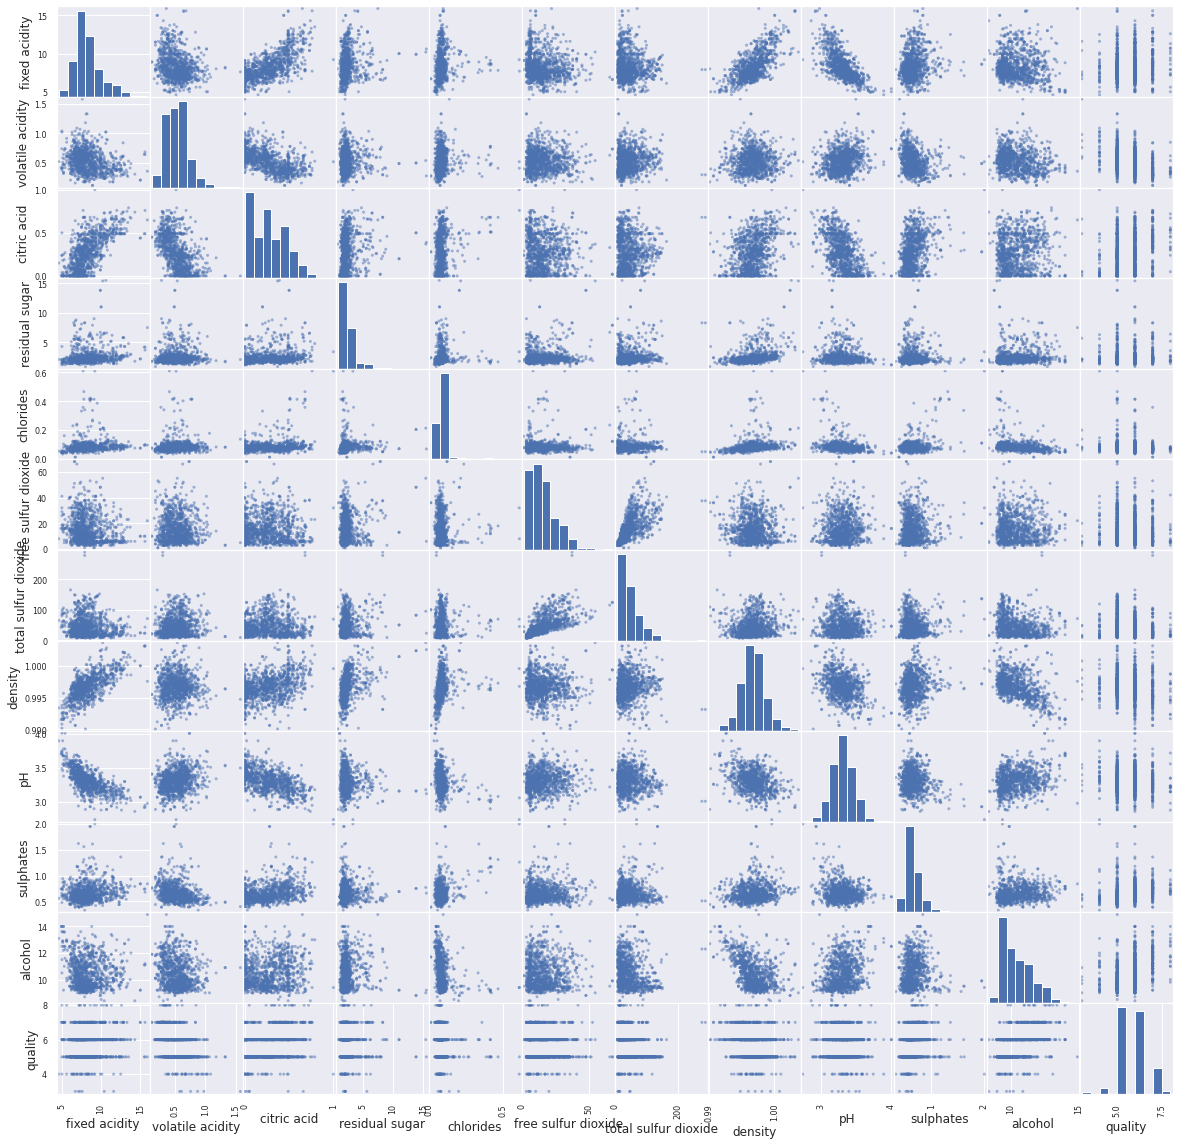

In [7]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

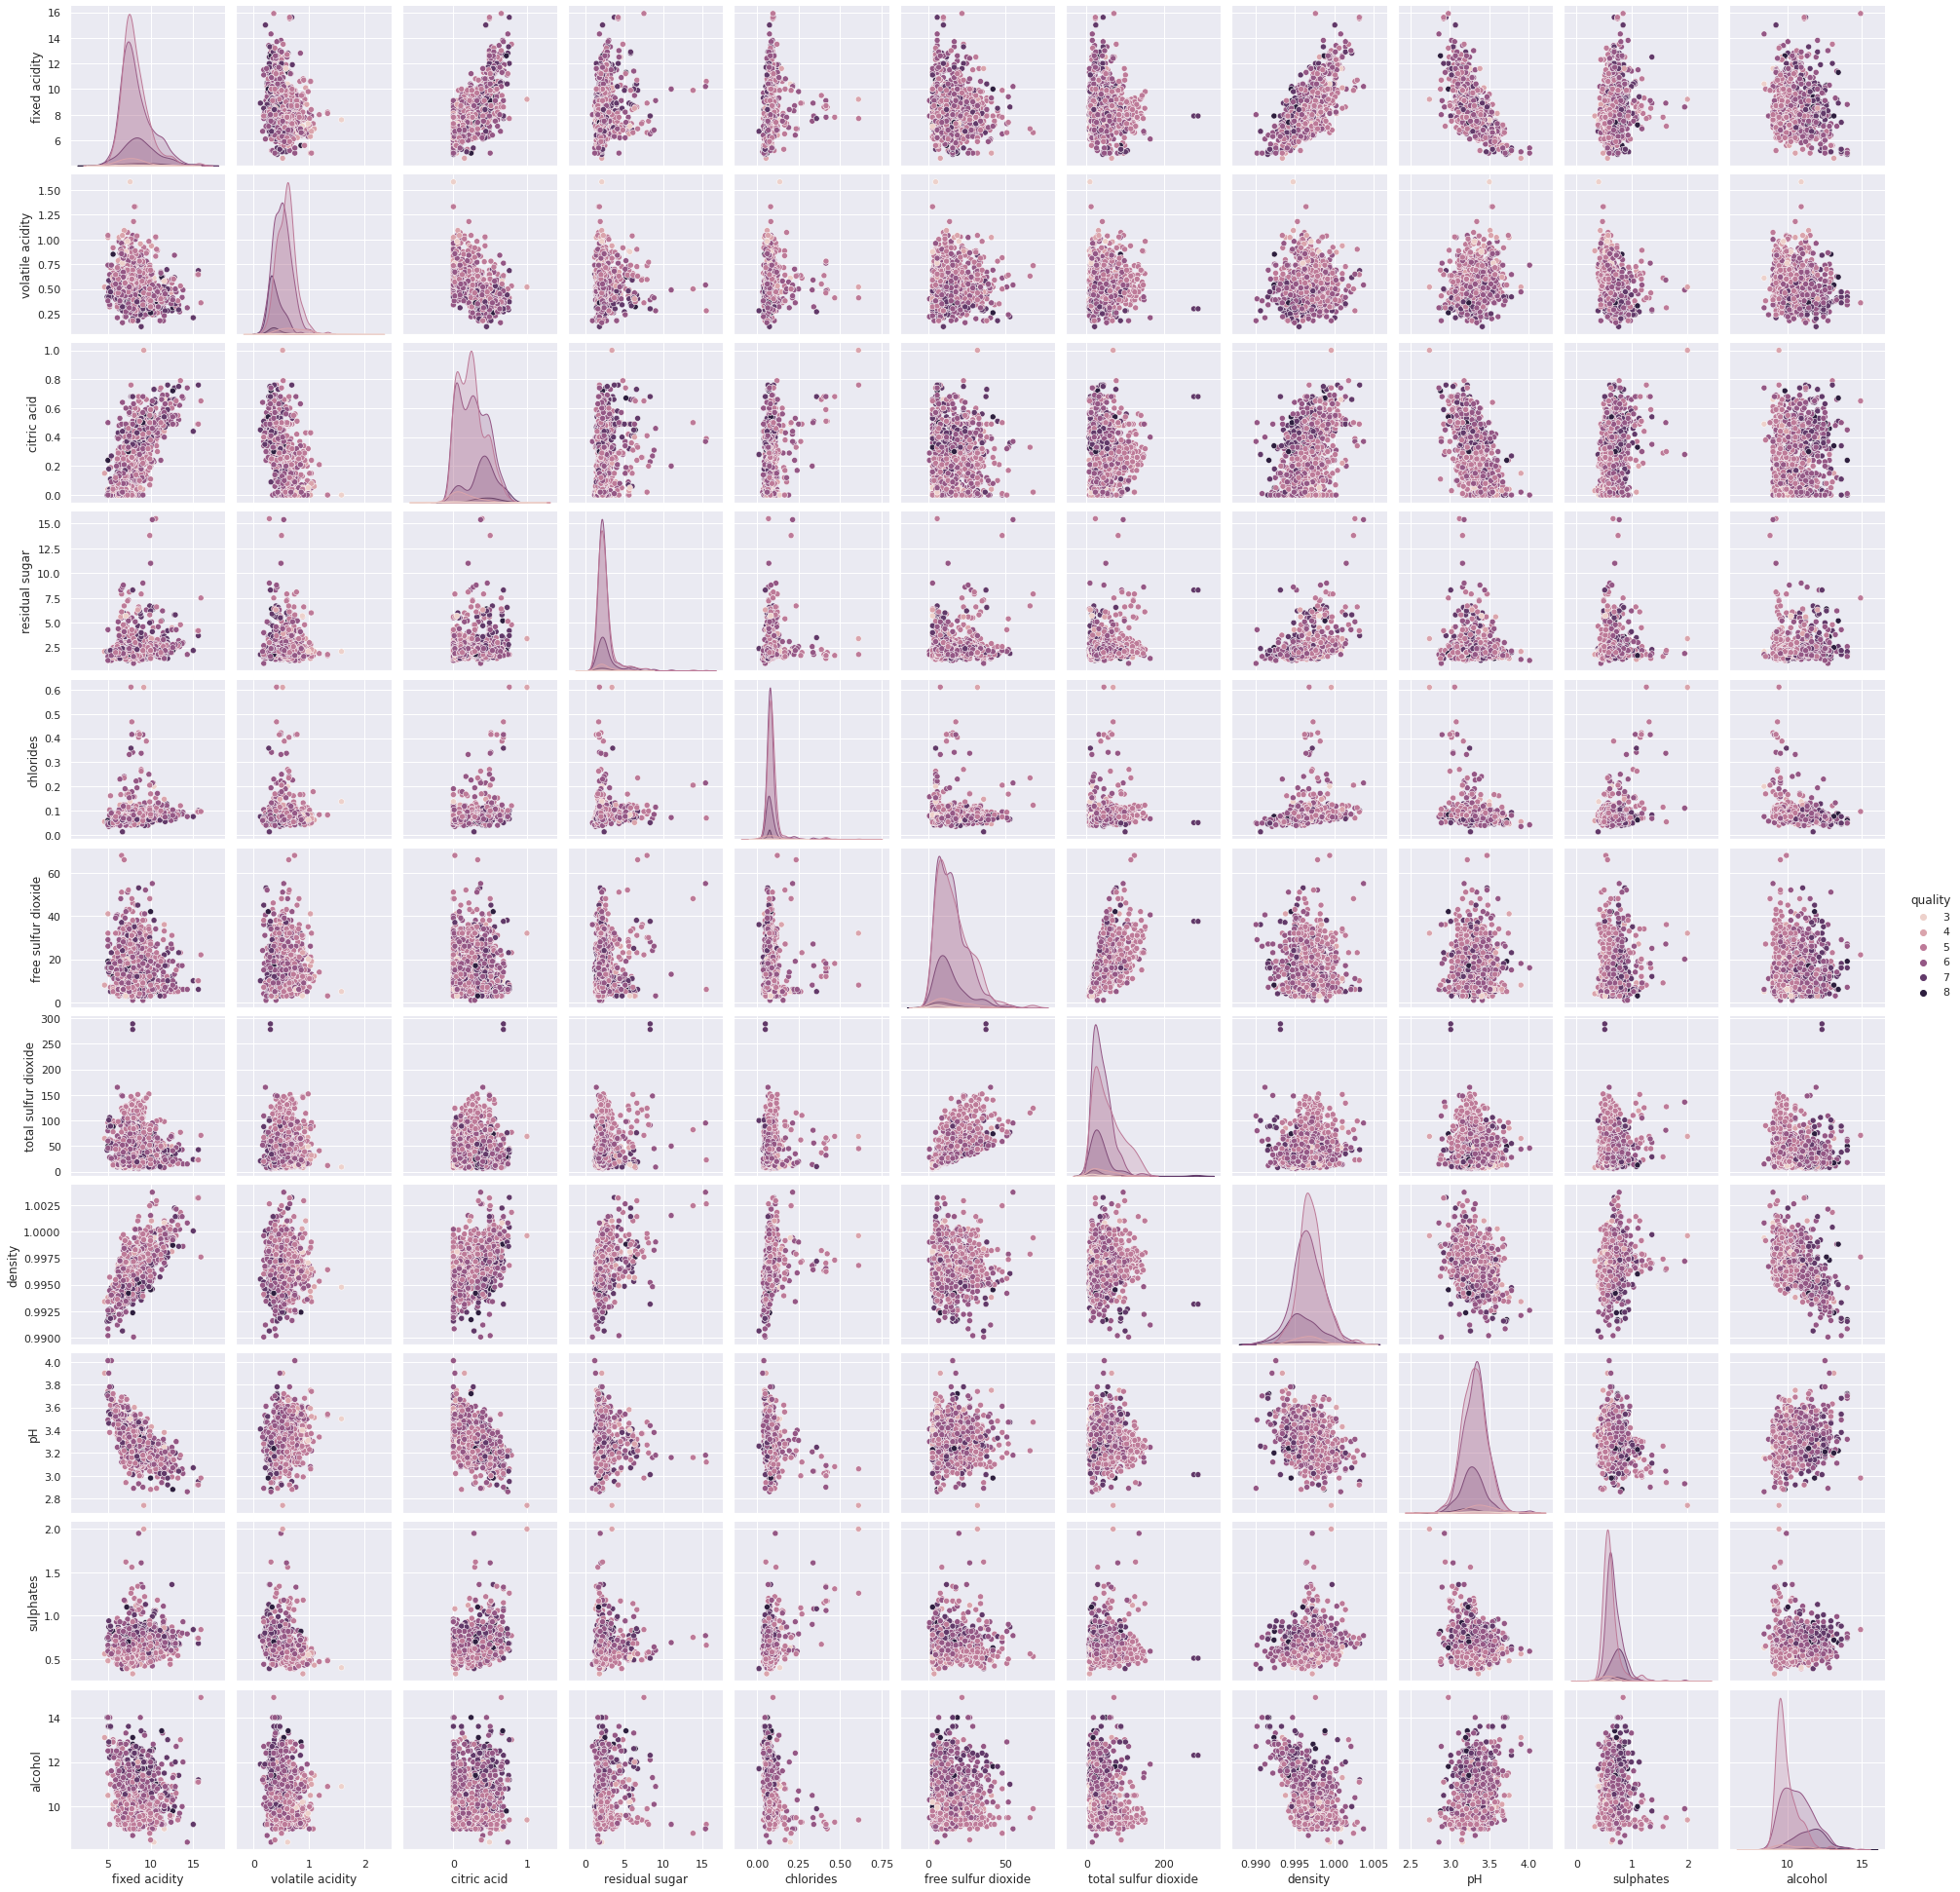

In [8]:
sns.pairplot(df, hue='quality')

## data modeling

### utility Functions

In [9]:
def norm(x):
    return ( (x - x.mean()) / x.std() )

def prepare_df(df):
    target = df.iloc[:, -1]
    train  = df.iloc[:, :-1]
    return train, target

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

### prepare the data

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

In [11]:
train, test               = train_test_split(df, test_size=.1)
train_data, train_targets = prepare_df(train)
test_data, test_targets   = prepare_df(test)

In [12]:
train_inputs              = norm(train_data)
test_inputs               = norm(test_data)

In [13]:
test_targets.unique()

array([6, 5, 4, 8, 7])

In [14]:
input = Input(shape=(len(train_inputs.columns),))

x = Dense(50, activation='relu', kernel_initializer='he_normal')(input)
x = Dropout(.1)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(.1)(x)
x = Dense(50, activation='relu')(x)

output = Dense(1, activation='relu')(x)
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51    


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

In [15]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss='mse',
              metrics=tf.keras.metrics.RootMeanSquaredError())

In [16]:
history = model.fit(train_inputs,
          train_targets,
          batch_size=64,
          epochs=100,
          #callbacks=[early_stopping],
          validation_data=(test_inputs, test_targets))

2022-02-01 17:28:49.890986: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
17/17 [==============================] - 1s 20ms/step - loss: 20.7088 - root_mean_squared_error: 4.5507 - val_loss: 12.3970 - val_root_mean_squared_error: 3.5209
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 8.5449 - root_mean_squared_error: 2.9232 - val_loss: 6.6681 - val_root_mean_squared_error: 2.5823
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 5.0869 - root_mean_squared_error: 2.2554 - val_loss: 4.6155 - val_root_mean_squared_error: 2.1484
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 3.8942 - root_mean_squared_error: 1.9734 - val_loss: 3.5350 - val_root_mean_squared_error: 1.8802
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 3.0721 - root_mean_squared_error: 1.7527 - val_loss: 3.0825 - val_root_mean_squared_error: 1.7557
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 2.6994 - root_mean_squared_error: 1.6430 - val_loss: 2.7167 - val_roo